The following simulation of Outbreaks makes use of Keeling's "iterate" function from his "Modeling Infectious Diseases" website (Program 7.6). It is important to note that this simulation assumes a latent period of 4 days and an infectious period of 7 days. Keeling uses these durations as well, and I found online that it takes a week for the cow's blisters to heal. They will salivate and stomp their hooves on the ground more frequently while they have these blisters which promotes spread of the disease.

Keeling's kernel was slightly adjusted for computational efficiency. Transmission probabilities (gotten by a kernel function whose input is the distance between infected and non-infected farms) is calculated through a Cauchy Kernel with two constraints. The constraints are also used by Keeling, without them the transmission probabilities are too low which inhibits the "take-off" of the infection. Using this kernel, a single outbreak typically runs for under 45 days.

In [31]:
import numpy as np
#The following simulates multiple outbreaks using the Keeling Kernel and returns the probability 
#that specific farms will be infected in a pre-specified amount of timesteps in the future
def MultipleOutbreaks(Num_outbreaks,N,Size,Y0,farms,start,end,x,y):
    #Num_outbreaks: number of simulations
    #N: number of farms
    #Size: grid size
    #Y0: number of initially infected farms
    #farms: farms to monitor
    #start: start timesetep during the outbreak
    #end: end timestep during outbreak
    counts = [0]*(len(farms))
    from NoCullingOutbreak import Outbreaks
    placeholder = np.c_[0,0,0]
    for i in range(Num_outbreaks):
        Outbreak = np.r_[placeholder,Outbreaks(N=N,Size=Size,Y0=Y0,farms=farms,start=start,end=end,x=x,y=y)]
        last_time = Outbreak[Outbreak[:,0]== end]
        for j in list(range(len(farms))):
            if last_time[j,2]>5:
                counts[j]+=1
    probs = [x/Num_outbreaks for x in counts]
    return(np.c_[farms,probs])  
Size = 20
N = 1000
farms = list(range(1,N-1))
x = Size*np.random.rand(N)
y = Size*np.random.rand(N)
test = MultipleOutbreaks(x=x,y=y,Num_outbreaks = 25,N = 1000, Size = 20, Y0 = 1, farms = farms, start = 15, end = 25)

In [32]:
#WHAT PROPORTION OF FARMS HAVE NONZERO RISK OF INFECTION DURING THAT TIMEFRAME
import numpy as np
print(np.sum(test[:,1]>0)/len(test[:,1]))
print(test[:,1])

0.953907815631
[ 0.16  0.    0.    0.12  0.16  0.    0.16  0.04  0.08  0.08  0.16  0.08
  0.08  0.    0.12  0.12  0.12  0.08  0.04  0.16  0.12  0.04  0.    0.16
  0.04  0.12  0.16  0.08  0.12  0.12  0.08  0.08  0.12  0.12  0.08  0.08
  0.    0.08  0.04  0.12  0.    0.12  0.04  0.04  0.12  0.16  0.04  0.2
  0.08  0.04  0.08  0.    0.04  0.04  0.    0.04  0.12  0.04  0.08  0.08
  0.04  0.    0.08  0.    0.08  0.08  0.04  0.    0.    0.04  0.    0.04
  0.04  0.04  0.04  0.04  0.    0.08  0.    0.04  0.    0.04  0.04  0.
  0.04  0.    0.    0.    0.04  0.    0.    0.04  0.04  0.08  0.    0.
  0.04  0.04  0.    0.    0.    0.    0.    0.    0.    0.    0.4   0.4
  0.48  0.44  0.56  0.44  0.48  0.32  0.52  0.64  0.6   0.56  0.72  0.52
  0.4   0.68  0.48  0.72  0.64  0.76  0.56  0.44  0.56  0.8   0.6   0.56
  0.56  0.68  0.68  0.52  0.64  0.6   0.68  0.64  0.48  0.48  0.72  0.6
  0.52  0.36  0.48  0.6   0.48  0.4   0.6   0.4   0.56  0.36  0.6   0.44
  0.28  0.12  0.4   0.32  0.24  0.16  0.44 

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/sandyalakkur/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


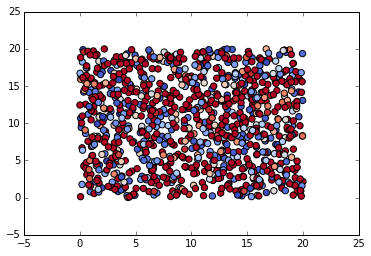

In [33]:
#BLUE = LOW RISK, WHITE = MEDIUM RISK, RED = HIGH RISK
#plt.plot(x[farms],y[farms],'r.')
plt.scatter(x[farms], y[farms], s=40, linewidths=1, c=test[:,1], cmap=plt.cm.coolwarm)
plt.show()